In [1]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("DataSet.csv")

In [3]:
data['new_cases_smoothed_ROI'].fillna(method='ffill', inplace=True)

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
new_cases_smoothed_ROI,739.0,1832.751210,3348.781724,2.429,286.500000,551.143000,1755.785500,23752.000000
stringency_index_ROI,739.0,60.104384,21.170897,11.110,44.440000,55.090000,81.480000,90.740000
new_cases_smoothed_NI,739.0,372.288104,348.920281,2.000,60.903035,309.655122,500.560061,1391.109156
COVID: (Ireland),739.0,29.391069,13.712296,14.000,20.000000,26.000000,34.000000,100.000000
COVID: (Northern Ireland),739.0,36.274696,14.342275,14.000,27.000000,34.000000,43.000000,100.000000


In [5]:
data.head()

,date,new_cases_smoothed_ROI,stringency_index_ROI,new_cases_smoothed_NI,COVID: (Ireland),COVID: (Northern Ireland)
0,06/03/2020,2.571,11.11,2.000000,29,14
1,07/03/2020,2.429,11.11,2.000000,29,14
2,08/03/2020,2.571,11.11,3.002704,29,14
3,09/03/2020,2.857,11.11,3.002025,50,34
4,10/03/2020,4.571,11.11,2.398370,50,34


In [6]:
data["date"] = pd.to_datetime(data["date"], format='%d/%m/%Y')

data = data.set_index('date')

In [7]:
data.columns

Index(['new_cases_smoothed_ROI', 'stringency_index_ROI',
       'new_cases_smoothed_NI', 'COVID: (Ireland)',
       'COVID: (Northern Ireland)'],
      dtype='object')

In [10]:
data.drop(columns=['stringency_index_ROI',
       'new_cases_smoothed_NI', 
       'COVID: (Northern Ireland)'],inplace=True)

In [11]:
df = data.copy(deep=True)

In [12]:
df.loc[:,'ncs_ROI'] = df.loc[:,'new_cases_smoothed_ROI'].shift(5)
df.loc[:,'ncs_ROI_diff'] = df.loc[:,'ncs_ROI'].diff()
df.loc[:,'ncs_ROI2'] = df.loc[:,'ncs_ROI'].shift()
df.loc[:,'ncs_ROI_diff2'] = df.loc[:,'ncs_ROI2'].diff()
df.loc[:,'ncs_ROI3'] = df.loc[:,'ncs_ROI2'].shift()
df.loc[:,'ncs_ROI_diff3'] = df.loc[:,'ncs_ROI3'].diff()
df.loc[:,'ncs_ROI4'] = df.loc[:,'ncs_ROI3'].shift()
df.loc[:,'ncs_ROI_diff4'] = df.loc[:,'ncs_ROI4'].diff()
df.loc[:,'ncs_ROI5'] = df.loc[:,'ncs_ROI4'].shift()
df.loc[:,'ncs_ROI_diff5'] = df.loc[:,'ncs_ROI5'].diff()
df.loc[:,'ncs_ROI6'] = df.loc[:,'ncs_ROI5'].shift()
df.loc[:,'ncs_ROI_diff6'] = df.loc[:,'ncs_ROI6'].diff()
df.loc[:,'ncs_ROI7'] = df.loc[:,'ncs_ROI6'].shift()
df.loc[:,'ncs_ROI_diff7'] = df.loc[:,'ncs_ROI7'].diff()

df.loc[:,'si'] = df.loc[:,'stringency_index_ROI'].shift(7)
df.loc[:,'si_diff'] = df.loc[:,'si'].diff()
df.loc[:,'si2'] = df.loc[:,'si'].shift()
df.loc[:,'si_diff2'] = df.loc[:,'si2'].diff()
df.loc[:,'si3'] = df.loc[:,'si2'].shift()
df.loc[:,'si_diff3'] = df.loc[:,'si3'].diff()
df.loc[:,'si4'] = df.loc[:,'si3'].shift()
df.loc[:,'si_diff4'] = df.loc[:,'si4'].diff()
df.loc[:,'si5'] = df.loc[:,'si4'].shift()
df.loc[:,'si_diff5'] = df.loc[:,'si5'].diff()
df.loc[:,'si6'] = df.loc[:,'si5'].shift()
df.loc[:,'si_diff6'] = df.loc[:,'si6'].diff()
df.loc[:,'si7'] = df.loc[:,'si6'].shift()
df.loc[:,'si_diff7'] = df.loc[:,'si7'].diff()

In [13]:
df.loc[:,'covid_ROI'] = df.loc[:,'COVID: (Ireland)'].shift(5)
df.loc[:,'covid_ROI_diff'] = df.loc[:,'covid_ROI'].diff()
df.loc[:,'covid_ROI2'] = df.loc[:,'covid_ROI'].shift()
df.loc[:,'covid_ROI_diff2'] = df.loc[:,'covid_ROI2'].diff()
df.loc[:,'covid_ROI3'] = df.loc[:,'covid_ROI2'].shift()
df.loc[:,'covid_ROI_diff3'] = df.loc[:,'covid_ROI3'].diff()
df.loc[:,'covid_ROI4'] = df.loc[:,'covid_ROI3'].shift()
df.loc[:,'covid_ROI_diff4'] = df.loc[:,'covid_ROI4'].diff()
df.loc[:,'covid_ROI5'] = df.loc[:,'covid_ROI4'].shift()
df.loc[:,'covid_ROI_diff5'] = df.loc[:,'covid_ROI5'].diff()
df.loc[:,'covid_ROI6'] = df.loc[:,'covid_ROI5'].shift()
df.loc[:,'covid_ROI_diff6'] = df.loc[:,'covid_ROI6'].diff()
df.loc[:,'covid_ROI7'] = df.loc[:,'covid_ROI6'].shift()
df.loc[:,'covid_ROI_diff7'] = df.loc[:,'covid_ROI7'].diff()

df.loc[:,'covid_NI'] = df.loc[:,'COVID: (Northern Ireland)'].shift()
df.loc[:,'covid_NI_diff'] = df.loc[:,'covid_NI'].diff()
df.loc[:,'covid_NI2'] = df.loc[:,'covid_NI'].shift()
df.loc[:,'covid_NI_diff2'] = df.loc[:,'covid_NI2'].diff()
df.loc[:,'covid_NI3'] = df.loc[:,'covid_NI2'].shift()
df.loc[:,'covid_NI_diff3'] = df.loc[:,'covid_NI3'].diff()
df.loc[:,'covid_NI4'] = df.loc[:,'covid_NI3'].shift()
df.loc[:,'covid_NI_diff4'] = df.loc[:,'covid_NI4'].diff()
df.loc[:,'covid_NI5'] = df.loc[:,'covid_NI4'].shift()
df.loc[:,'covid_NI_diff5'] = df.loc[:,'covid_NI5'].diff()
df.loc[:,'covid_NI6'] = df.loc[:,'covid_NI5'].shift()
df.loc[:,'covid_NI_diff6'] = df.loc[:,'covid_NI6'].diff()
df.loc[:,'covid_NI7'] = df.loc[:,'covid_NI6'].shift()
df.loc[:,'covid_NI_diff7'] = df.loc[:,'covid_NI7'].diff()

In [14]:
df = df.fillna(0)

In [15]:
df.head(5)

,new_cases_smoothed_ROI,COVID: (Ireland),ncs_ROI,ncs_ROI_diff,ncs_ROI2,ncs_ROI_diff2,ncs_ROI3,ncs_ROI_diff3,ncs_ROI4,ncs_ROI_diff4,...,covid_ROI3,covid_ROI_diff3,covid_ROI4,covid_ROI_diff4,covid_ROI5,covid_ROI_diff5,covid_ROI6,covid_ROI_diff6,covid_ROI7,covid_ROI_diff7
date,,,,,,,,,,,,,,,,,,,,,
2020-03-06,2.571,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-07,2.429,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-08,2.571,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-09,2.857,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-10,4.571,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.shape

(739, 30)

In [17]:
df.columns

Index(['new_cases_smoothed_ROI', 'COVID: (Ireland)', 'ncs_ROI', 'ncs_ROI_diff',
       'ncs_ROI2', 'ncs_ROI_diff2', 'ncs_ROI3', 'ncs_ROI_diff3', 'ncs_ROI4',
       'ncs_ROI_diff4', 'ncs_ROI5', 'ncs_ROI_diff5', 'ncs_ROI6',
       'ncs_ROI_diff6', 'ncs_ROI7', 'ncs_ROI_diff7', 'covid_ROI',
       'covid_ROI_diff', 'covid_ROI2', 'covid_ROI_diff2', 'covid_ROI3',
       'covid_ROI_diff3', 'covid_ROI4', 'covid_ROI_diff4', 'covid_ROI5',
       'covid_ROI_diff5', 'covid_ROI6', 'covid_ROI_diff6', 'covid_ROI7',
       'covid_ROI_diff7'],
      dtype='object')

In [18]:
n = len(df)

In [22]:
X_train = df.iloc[0:int(n*0.7)].drop('new_cases_smoothed_ROI', axis=1)
y_train = df.iloc[0:int(n*0.7)].drop(['COVID: (Ireland)', 'ncs_ROI', 'ncs_ROI_diff',
       'ncs_ROI2', 'ncs_ROI_diff2', 'ncs_ROI3', 'ncs_ROI_diff3', 'ncs_ROI4',
       'ncs_ROI_diff4', 'ncs_ROI5', 'ncs_ROI_diff5', 'ncs_ROI6',
       'ncs_ROI_diff6', 'ncs_ROI7', 'ncs_ROI_diff7', 'covid_ROI',
       'covid_ROI_diff', 'covid_ROI2', 'covid_ROI_diff2', 'covid_ROI3',
       'covid_ROI_diff3', 'covid_ROI4', 'covid_ROI_diff4', 'covid_ROI5',
       'covid_ROI_diff5', 'covid_ROI6', 'covid_ROI_diff6', 'covid_ROI7',
       'covid_ROI_diff7'], axis=1)

In [19]:
X_test = df.iloc[0:int(n*0.7)].drop('new_cases_smoothed_ROI', axis=1)
y_test = df.iloc[0:int(n*0.7)].drop(['COVID: (Ireland)', 'ncs_ROI', 'ncs_ROI_diff',
       'ncs_ROI2', 'ncs_ROI_diff2', 'ncs_ROI3', 'ncs_ROI_diff3', 'ncs_ROI4',
       'ncs_ROI_diff4', 'ncs_ROI5', 'ncs_ROI_diff5', 'ncs_ROI6',
       'ncs_ROI_diff6', 'ncs_ROI7', 'ncs_ROI_diff7', 'covid_ROI',
       'covid_ROI_diff', 'covid_ROI2', 'covid_ROI_diff2', 'covid_ROI3',
       'covid_ROI_diff3', 'covid_ROI4', 'covid_ROI_diff4', 'covid_ROI5',
       'covid_ROI_diff5', 'covid_ROI6', 'covid_ROI_diff6', 'covid_ROI7',
       'covid_ROI_diff7'], axis=1)

In [20]:
X_val = df.iloc[0:int(n*0.7)].drop('new_cases_smoothed_ROI', axis=1)
y_val = df.iloc[0:int(n*0.7)].drop(['COVID: (Ireland)', 'ncs_ROI', 'ncs_ROI_diff',
       'ncs_ROI2', 'ncs_ROI_diff2', 'ncs_ROI3', 'ncs_ROI_diff3', 'ncs_ROI4',
       'ncs_ROI_diff4', 'ncs_ROI5', 'ncs_ROI_diff5', 'ncs_ROI6',
       'ncs_ROI_diff6', 'ncs_ROI7', 'ncs_ROI_diff7', 'covid_ROI',
       'covid_ROI_diff', 'covid_ROI2', 'covid_ROI_diff2', 'covid_ROI3',
       'covid_ROI_diff3', 'covid_ROI4', 'covid_ROI_diff4', 'covid_ROI5',
       'covid_ROI_diff5', 'covid_ROI6', 'covid_ROI_diff6', 'covid_ROI7',
       'covid_ROI_diff7'], axis=1)

In [24]:
X_train

,COVID: (Ireland),ncs_ROI,ncs_ROI_diff,ncs_ROI2,ncs_ROI_diff2,ncs_ROI3,ncs_ROI_diff3,ncs_ROI4,ncs_ROI_diff4,ncs_ROI5,...,covid_ROI3,covid_ROI_diff3,covid_ROI4,covid_ROI_diff4,covid_ROI5,covid_ROI_diff5,covid_ROI6,covid_ROI_diff6,covid_ROI7,covid_ROI_diff7
date,,,,,,,,,,,,,,,,,,,,,
2020-03-06,29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-07,29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-08,29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-09,50,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-10,50,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,31,1241.571,29.285,1212.286,-7.571,1219.857,-4.572,1224.429,30.858,1193.571,...,36.0,0.0,36.0,0.0,36.0,0.0,36.0,0.0,36.0,0.0
2021-08-01,31,1242.143,0.572,1241.571,29.285,1212.286,-7.571,1219.857,-4.572,1224.429,...,36.0,0.0,36.0,0.0,36.0,0.0,36.0,0.0,36.0,0.0
2021-08-02,31,1248.000,5.857,1242.143,0.572,1241.571,29.285,1212.286,-7.571,1219.857,...,31.0,-5.0,36.0,0.0,36.0,0.0,36.0,0.0,36.0,0.0


In [25]:
model = MLPRegressor()

In [26]:
param_search = {
    "hidden_layer_sizes": [(1,),(50,),(100,),(150,),(200,),(250,),(300,),(350,)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": [0.00005,0.0005, 0.005],
    "learning_rate": ['constant', 'invscaling', 'adaptive']
}

In [27]:
tsvc = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tsvc, param_grid=param_search, scoring='r2')
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [28]:
print(best_model)

MLPRegressor(activation='identity', alpha=5e-05, hidden_layer_sizes=(50,))


In [29]:
print(best_score)

0.7928190571814617


In [30]:
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test)

print(r2_score(y_test, y_pred))

0.894004345165266


In [31]:
y_val_pred = best_model.predict(X_val)

In [32]:
print(r2_score(y_val, y_val_pred))

0.894004345165266


In [33]:
y_test['predictions'] = y_pred.tolist()

<AxesSubplot:xlabel='date'>

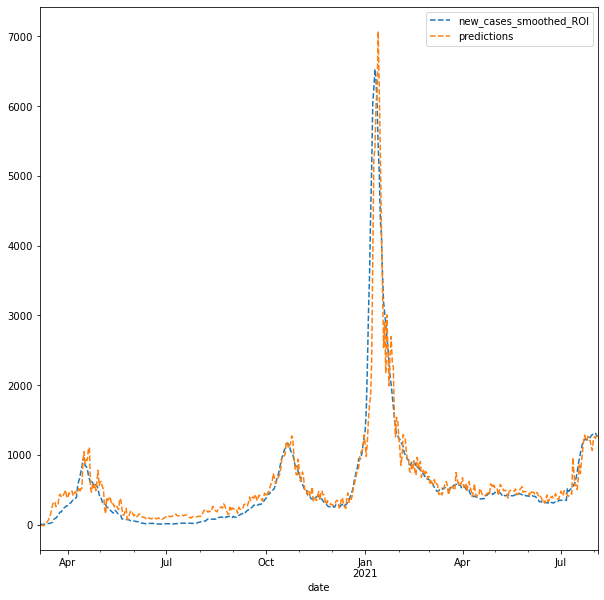

In [34]:
y_test.reset_index(inplace=True)
y_test.plot(x='date', y=['new_cases_smoothed_ROI','predictions'], linestyle="dashed", figsize=(10,10))


In [35]:
y_val['predictions'] = y_val_pred.tolist()

In [36]:
y_val.reset_index(inplace=True)

<AxesSubplot:xlabel='date'>

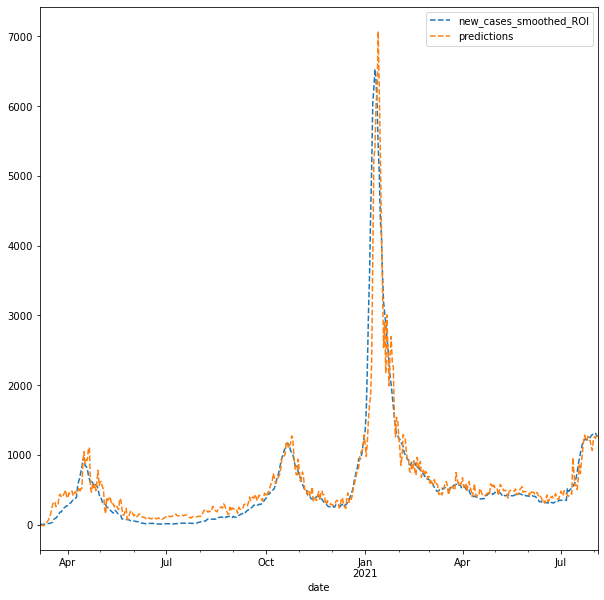

In [37]:
y_val.plot(x='date', y=['new_cases_smoothed_ROI', 'predictions'], linestyle="dashed", figsize=(10,10))